<a href="https://colab.research.google.com/github/Iftekhar-mobin/TimeSeriesLSTM/blob/main/Multivariate_Multi_Step_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference : https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Reference : https://towardsdatascience.com/predictive-analytics-time-series-forecasting-with-gru-and-bilstm-in-tensorflow-87588c852915

In [1]:
from tensorflow.keras.models import save_model, load_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf

# from google.colab import drive
# drive.mount('/content/drive')

In [30]:
training_file = 'H4_EURUSD_2015.csv'

In [16]:
df_h1 = pd.read_csv('H1_EURUSD_2015.csv',delimiter=',', 
                    usecols=['open', 'high', 'low', 'close'])
df_h4 = pd.read_csv(training_file,delimiter=',', 
                   usecols=['open', 'high', 'low', 'close'])
# df_D1 = pd.read_csv('D1_EURUSD_2015.csv',delimiter=',',index_col=0)
# df_m30 = pd.read_csv('M30_EURUSD_2015.csv',delimiter=',',index_col=0)


In [17]:
df_h1.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'} ,
             inplace = True)
df_h4.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'} ,
             inplace = True)

In [18]:
df_h1

,Open,High,Low,Close
0,1.20997,1.21089,1.20966,1.20999
1,1.20481,1.20569,1.20479,1.20538
2,1.20537,1.20574,1.20341,1.20553
3,1.20556,1.20689,1.20442,1.20469
4,1.20468,1.20599,1.20380,1.20573
...,...,...,...,...
58126,1.07713,1.07784,1.07685,1.07749
58127,1.07748,1.07765,1.07722,1.07731
58128,1.07730,1.07731,1.07688,1.07726
58129,1.07725,1.07748,1.07707,1.07707


In [19]:
df_h1['avg'] = df_h1.loc[:, ['Open', 'High', 'Low', 'Close']].mean(axis=1)

df_h4['avg'] = df_h4.loc[:, ['Open', 'High', 'Low', 'Close']].mean(axis=1)

In [67]:
df = pd.read_csv('GBPUSD1440.csv',delimiter=',')
df.columns =['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']

In [68]:
df = df[['Open', 'High', 'Low', 'Close']]

In [69]:
df['avg'] = df.loc[:, ['Open', 'High', 'Low', 'Close']].mean(axis=1)

In [20]:
df_h1

,Open,High,Low,Close,avg
0,1.20997,1.21089,1.20966,1.20999,1.210128
1,1.20481,1.20569,1.20479,1.20538,1.205167
2,1.20537,1.20574,1.20341,1.20553,1.205013
3,1.20556,1.20689,1.20442,1.20469,1.205390
4,1.20468,1.20599,1.20380,1.20573,1.205050
...,...,...,...,...,...
58126,1.07713,1.07784,1.07685,1.07749,1.077327
58127,1.07748,1.07765,1.07722,1.07731,1.077415
58128,1.07730,1.07731,1.07688,1.07726,1.077187
58129,1.07725,1.07748,1.07707,1.07707,1.077217


In [21]:
df_h4

,Open,High,Low,Close,avg
0,1.20481,1.20689,1.20341,1.20573,1.205210
1,1.20573,1.20576,1.20248,1.20303,1.204250
2,1.20302,1.20329,1.20031,1.20090,1.201880
3,1.20093,1.20149,1.19993,1.20002,1.200593
4,1.19511,1.19754,1.18599,1.19539,1.193507
...,...,...,...,...,...
14561,1.07783,1.07817,1.07721,1.07730,1.077627
14562,1.07729,1.07858,1.07706,1.07797,1.077725
14563,1.07800,1.07852,1.07653,1.07691,1.077490
14564,1.07695,1.07891,1.07594,1.07749,1.077322


In [88]:
dataset = df_h4

In [22]:
dataset = df_h4

In [23]:
x_1 = dataset['Close']
x_2 = dataset['Open']
x_3 = dataset['High']
x_4 = dataset['Low']
y = dataset['avg']

x_1 = x_1.values
x_2 = x_2.values
x_3 = x_3.values
x_4 = x_4.values
y = y.values

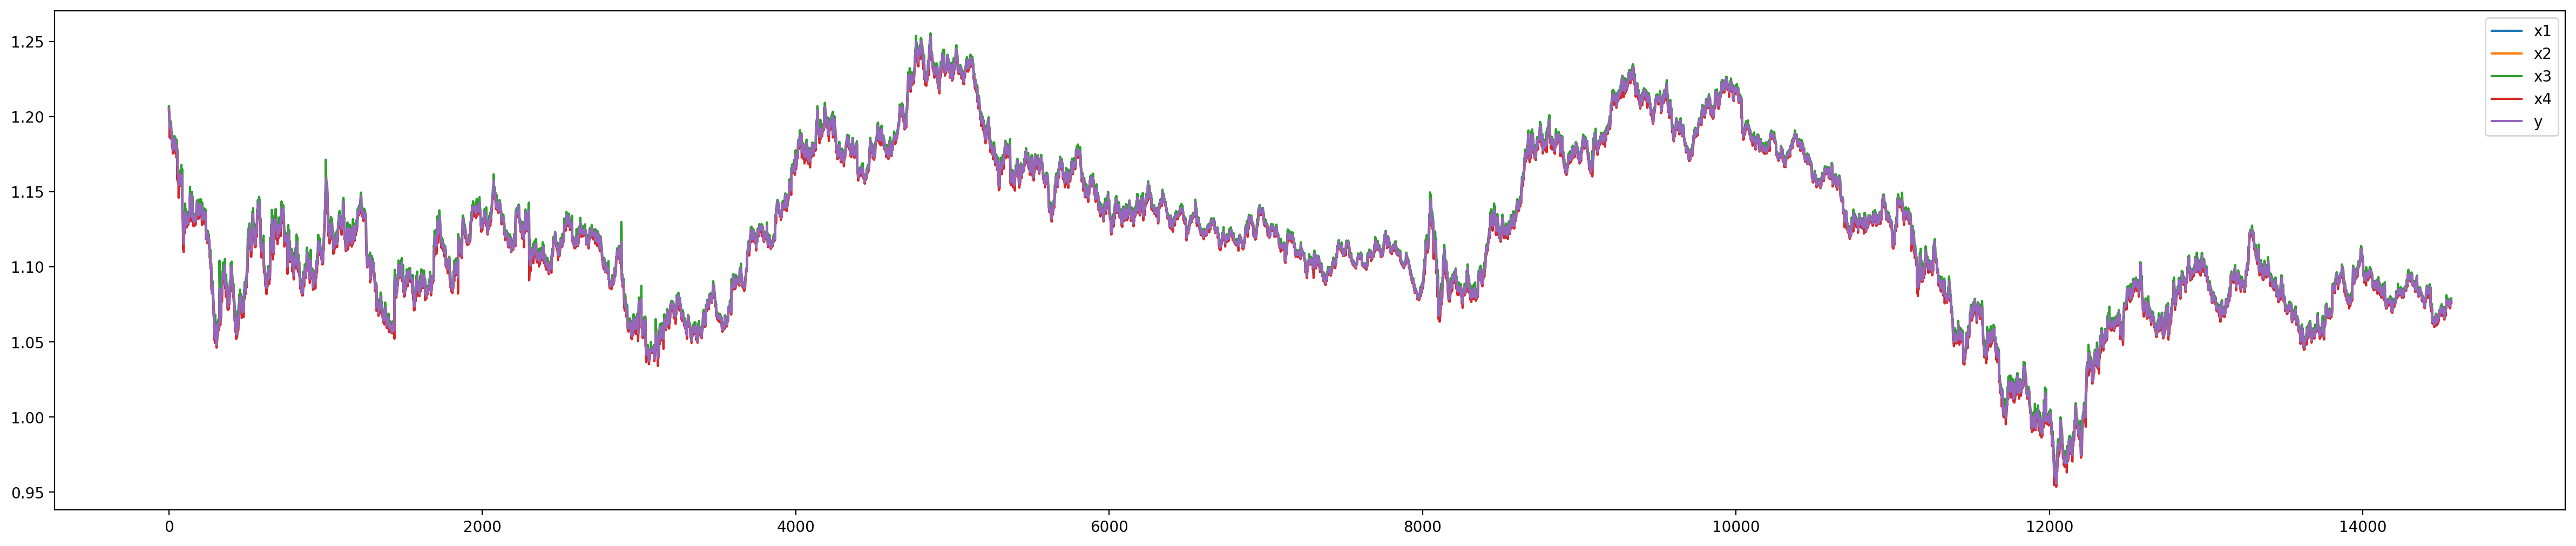

In [24]:
plt.figure(figsize=(30, 6))
plt.plot(x_1[:-1] , label='x1')
plt.plot(x_2[:-1] , label='x2')
plt.plot(x_3[:-1] , label='x3')
plt.plot(x_4[:-1] , label='x4')
plt.plot(y[:-1] , label='y')
plt.legend(loc='upper right')
# plt.title("Dataset" ,  fontsize=18)
# plt.xlabel('Time step' ,  fontsize=18)
# plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [25]:
# convert to [rows, columns] structure
x_1 = x_1.reshape((len(x_1), 1))
x_2 = x_2.reshape((len(x_2), 1))
x_3 = x_2.reshape((len(x_3), 1))
x_4 = x_2.reshape((len(x_4), 1))
y = y.reshape((len(y), 1))

print ("x_1.shape" , x_1.shape)
print ("x_2.shape" , x_2.shape)
print ("y.shape" , y.shape)

x_1.shape (14566, 1)
x_2.shape (14566, 1)
y.shape (14566, 1)


In [26]:
# normalization features
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
x_3_scaled = scaler.fit_transform(x_3)
x_4_scaled = scaler.fit_transform(x_4)
y_scaled = scaler.fit_transform(y)

# horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, x_3_scaled, x_4_scaled, y_scaled))

print ("dataset_stacked.shape" , dataset_stacked.shape)

dataset_stacked.shape (14566, 5)


In [27]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [28]:
## choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 60 , 30

# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)

print ("X.shape" , X.shape)
print ("y.shape" , y.shape)

split = int(len(X)*0.9)
train_X , train_y = X[:split, :] , y[:split, :]
test_X , test_y = X[split:, :] , y[split:, :]

n_features = train_X.shape[2]


print ("train_X.shape" , train_X.shape)
print ("train_y.shape" , train_y.shape)
print ("test_X.shape" , test_X.shape)
print ("test_y.shape" , test_y.shape)
print ("n_features" , n_features)

X.shape (14478, 60, 4)
y.shape (14478, 30)
train_X.shape (13030, 60, 4)
train_y.shape (13030, 30)
test_X.shape (1448, 60, 4)
test_y.shape (1448, 30)
n_features 4


**LSTM Model Parameter Setting**

In [29]:
#optimizer learning rate
# opt = keras.optimizers.Adam(learning_rate=0.01)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
# model.add(Activation('linear'))
model.compile(loss='mse' , optimizer='adam' , metrics=['accuracy'])


In [32]:
model_name = training_file +'__'+ 'TS_model.h5'
model_name

'H4_EURUSD_2015.csv__TS_model.h5'

In [33]:

try:
    model = load_model(model_name)
except OSError as e:
    print("Model is not loaded, Training model now:", e)
    # Fit network
    history = model.fit(train_X, train_y , epochs=25,  
                        verbose=1,validation_data=(test_X, test_y), 
                        validation_split = 0.1, shuffle=False)
    model.save(model_name)
    

Model is not loaded, Training model now: No file or directory found at H4_EURUSD_2015.csv__TS_model.h5
Epoch 1/25
408/408 [==============================] - 18s 40ms/step - loss: 0.0173 - accuracy: 0.0384 - val_loss: 0.0013 - val_accuracy: 0.0773
Epoch 2/25
408/408 [==============================] - 17s 41ms/step - loss: 0.0024 - accuracy: 0.0346 - val_loss: 0.0032 - val_accuracy: 0.0269
Epoch 3/25
408/408 [==============================] - 17s 43ms/step - loss: 0.0036 - accuracy: 0.0373 - val_loss: 0.0029 - val_accuracy: 0.0297
Epoch 4/25
408/408 [==============================] - 17s 42ms/step - loss: 0.0050 - accuracy: 0.0351 - val_loss: 0.0015 - val_accuracy: 0.0235
Epoch 5/25
408/408 [==============================] - 17s 42ms/step - loss: 0.0052 - accuracy: 0.0332 - val_loss: 0.0014 - val_accuracy: 0.0456
Epoch 6/25
408/408 [==============================] - 17s 43ms/step - loss: 0.0049 - accuracy: 0.0355 - val_loss: 0.0012 - val_accuracy: 0.0262
Epoch 7/25
408/408 [=============

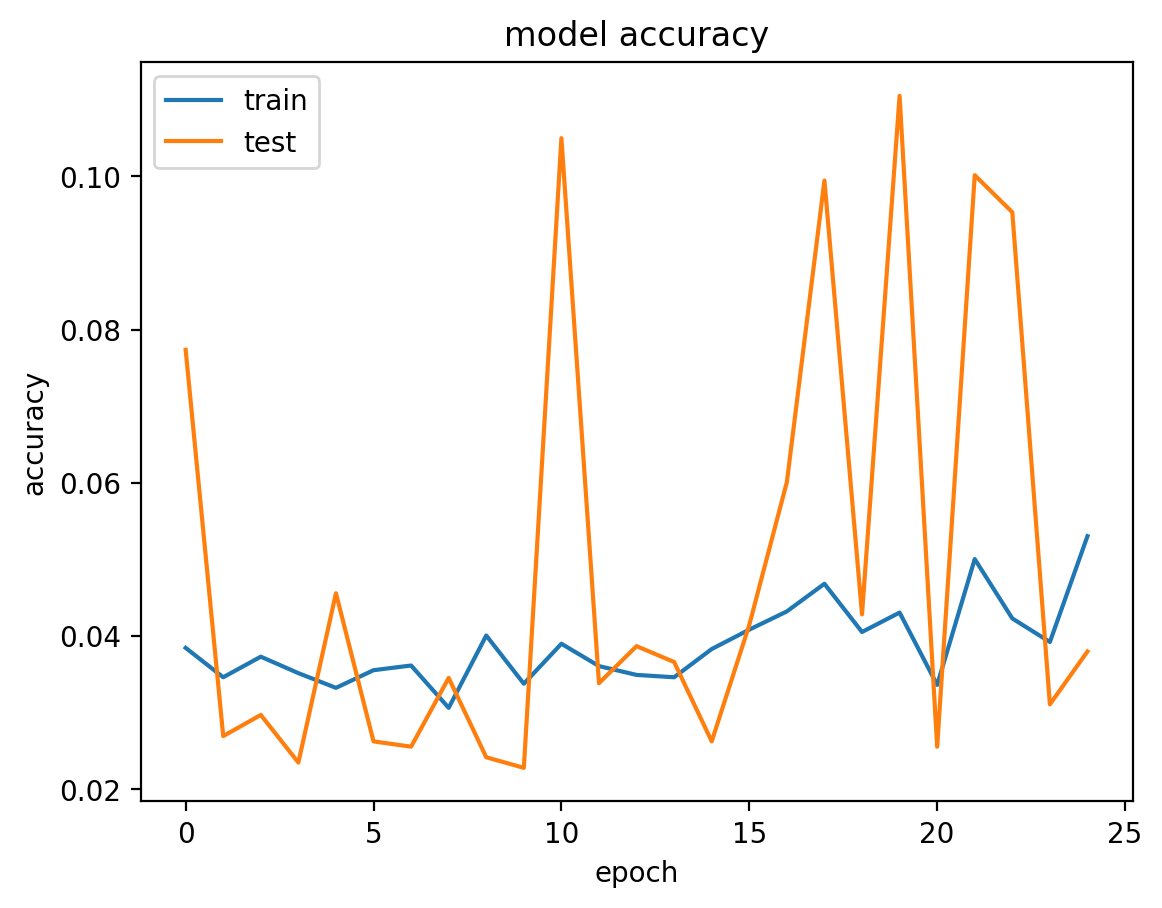

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

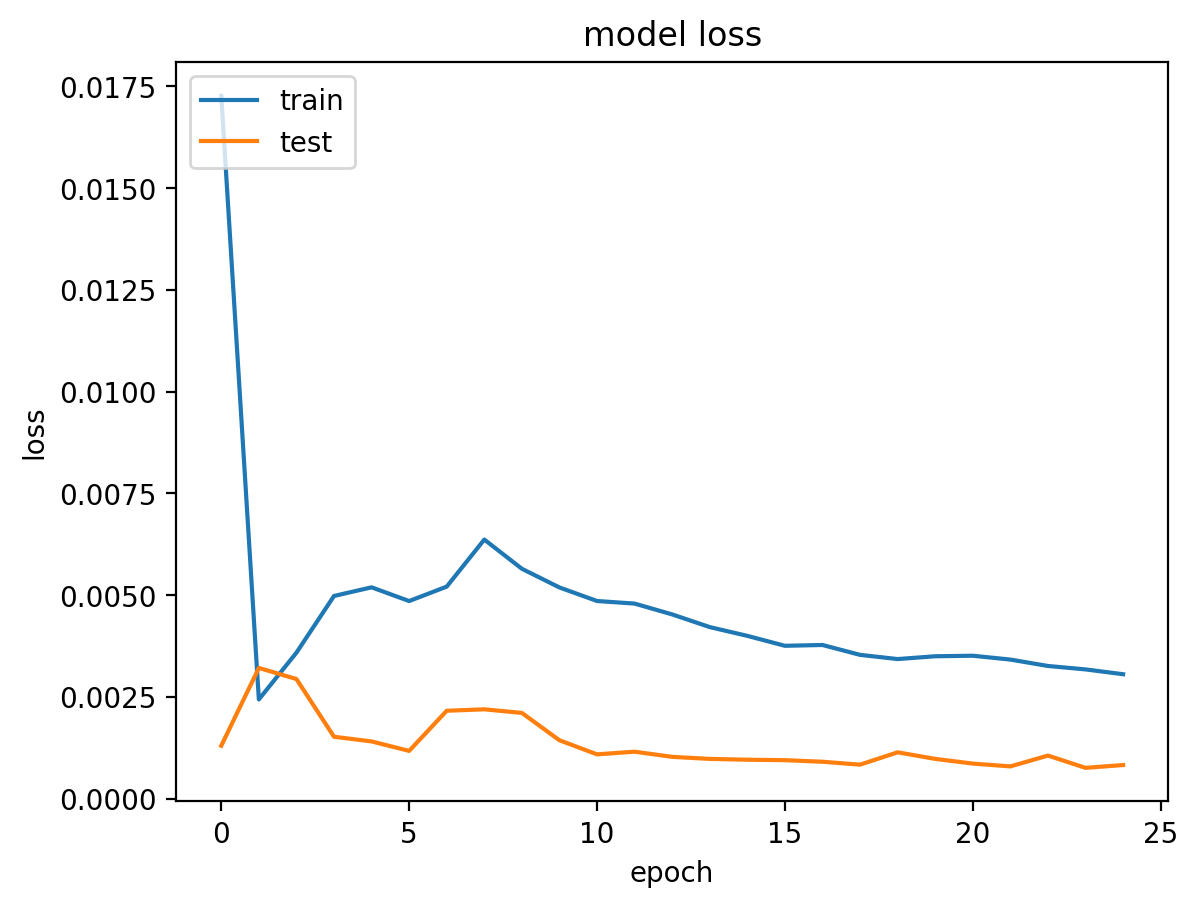

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
predicted_price = model.predict(test_X)

46/46 [==============================] - 1s 14ms/step


In [44]:
predicted_price.shape

(1448, 30)

In [45]:
# plt.plot(predicted_price[-1])
# plt.plot(test_y[-1])

collector = []
for i in range(len(predicted_price)):
#     print(predicted_price[i, -1:])
    collector.append(predicted_price[i, -1:])

pr_price_avg = np.average(predicted_price, axis=1)

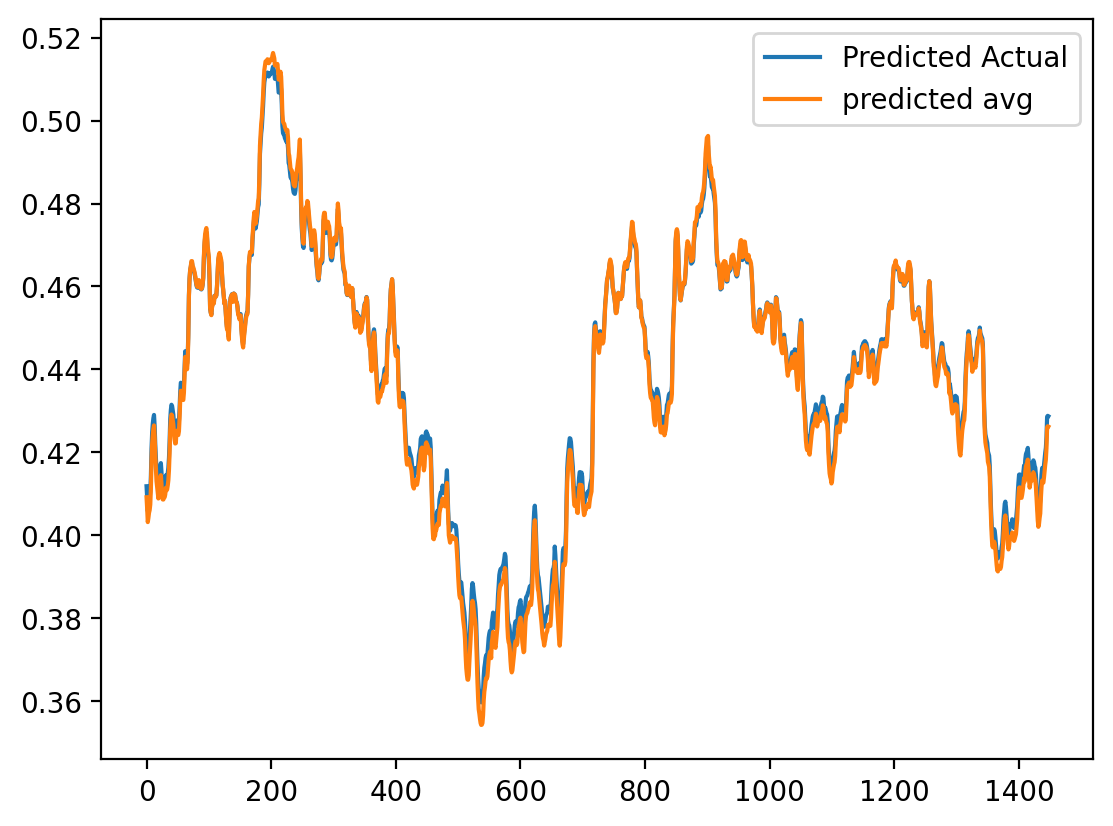

In [46]:
plt.plot(collector, label='Predicted Actual')
plt.plot(pr_price_avg, label='predicted avg')
plt.legend()

In [47]:
filler = np.ones((test_y.shape[1]))
filler[:] = np.nan
ac_avg_filler = np.concatenate((filler, np.average(test_y, axis=1)))


test_y_avg = np.average(test_y, axis=1)
test_y_avg[-n_steps_out:] = np.nan
ac_avg_filler_minus = test_y_avg    

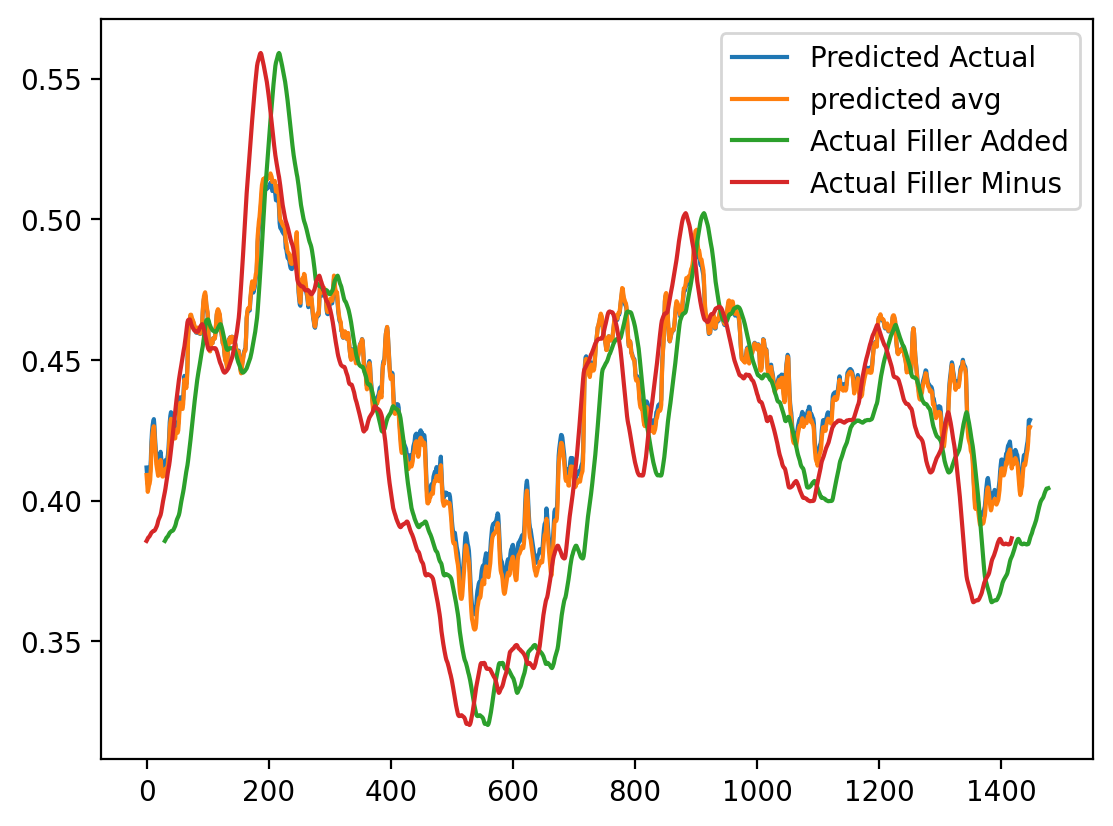

In [48]:
plt.plot(collector, label='Predicted Actual')
plt.plot(pr_price_avg, label='predicted avg')
plt.plot(ac_avg_filler, label = 'Actual Filler Added')
plt.plot(ac_avg_filler_minus, label = 'Actual Filler Minus')
plt.legend()
plt.show()

In [49]:
pr_price_avg_df = pd.DataFrame(pr_price_avg.reshape(-1,1), columns=['prediction'])

In [50]:
pr_price_avg_df

,prediction
0,0.409128
1,0.406387
2,0.403138
3,0.404153
4,0.405385
...,...
1443,0.418195
1444,0.420977
1445,0.426016
1446,0.426273


In [51]:
def generate_ema(dataframe, ema_span, col_name):
    ema_col = 'EWMA'+ str(ema_span)
    dataframe[ema_col] = dataframe[col_name].ewm(span=ema_span, adjust=False).mean()
    return dataframe

In [52]:
# Define periods for short and long moving averages
short_period = 2
long_period = 3

In [53]:
pr_price_avg_df = generate_ema(pr_price_avg_df, short_period, 'prediction')
pr_price_avg_df = generate_ema(pr_price_avg_df, long_period, 'prediction')

In [54]:
threshold = 0.002
# pr_price_avg_df['Signal'] = np.where((pr_price_avg_df['EWMA2'] - 
#                                      pr_price_avg_df['EWMA3']) > threshold, 
#                                      1, 0)
# pr_price_avg_df['Signal'] = np.where((pr_price_avg_df['EWMA2'] - 
#                                      pr_price_avg_df['EWMA3']) < -threshold, 
#                                      -1, pr_price_avg_df['Signal'])

pr_price_avg_df['Signal'] = np.where(pr_price_avg_df['EWMA2']>pr_price_avg_df['EWMA3'],1,-1)

# Calculate the percentage change between consecutive rows
pr_price_avg_df['pct_change'] = abs(pr_price_avg_df['prediction'].pct_change())

In [55]:
threshold_percentage_change = 0.002

flag=1
for i in range(0, len(pr_price_avg_df)-1):
    if abs(pr_price_avg_df.at[i, 'pct_change'] + abs(pr_price_avg_df.at[i+1, 'pct_change'])) \
        < threshold_percentage_change:
        pr_price_avg_df.at[i, 'Signal']==0
        
    if pr_price_avg_df.at[i, 'Signal']==1 and pr_price_avg_df.at[i+1, 'Signal']==1 and flag==1:
        flag=-1
    elif pr_price_avg_df.at[i, 'Signal']==1 and pr_price_avg_df.at[i+1, 'Signal']==1 and flag==-1:
        pr_price_avg_df.at[i, 'Signal'] = 0
    elif pr_price_avg_df.at[i, 'Signal']==-1 and pr_price_avg_df.at[i+1, 'Signal']==-1 and flag==1:
        flag=-1
    elif pr_price_avg_df.at[i, 'Signal']==-1 and pr_price_avg_df.at[i+1, 'Signal']==-1 and flag==-1:
        pr_price_avg_df.at[i, 'Signal'] = 0
    elif (pr_price_avg_df.at[i, 'Signal']==-1 and pr_price_avg_df.at[i+1, 'Signal']==1):
        pr_price_avg_df.at[i, 'Signal'] = 0
        pr_price_avg_df.at[i+1, 'Signal'] = 0
        pr_price_avg_df.at[i+2, 'Signal'] = 1
    elif pr_price_avg_df.at[i, 'Signal']==1 and pr_price_avg_df.at[i+1, 'Signal']==-1:
        pr_price_avg_df.at[i, 'Signal'] = 0
        pr_price_avg_df.at[i+1, 'Signal'] = 0
        pr_price_avg_df.at[i+2, 'Signal'] = -1
    else:
        flag=1



In [56]:
pr_price_avg_df

,prediction,EWMA2,EWMA3,Signal,pct_change
0,0.409128,0.409128,0.409128,-1,NaN
1,0.406387,0.407300,0.407757,0,0.006699
2,0.403138,0.404526,0.405448,0,0.007994
3,0.404153,0.404277,0.404800,0,0.002518
4,0.405385,0.405016,0.405093,0,0.003049
...,...,...,...,...,...
1443,0.418195,0.417557,0.416926,0,0.002847
1444,0.420977,0.419837,0.418951,0,0.006651
1445,0.426016,0.423956,0.422484,0,0.011971
1446,0.426273,0.425501,0.424378,0,0.000604


In [57]:
signal_index = pr_price_avg_df[(pr_price_avg_df['Signal']==1) | (pr_price_avg_df['Signal']==-1)]
signal_index = signal_index.reset_index()

In [58]:
signal_index

,index,prediction,EWMA2,EWMA3,Signal,pct_change
0,0,0.409128,0.409128,0.409128,-1,NaN
1,6,0.407386,0.406819,0.406472,1,0.003360
2,15,0.416157,0.417819,0.419034,-1,0.007853
3,22,0.413673,0.412976,0.412527,1,0.003526
4,25,0.409267,0.410475,0.411095,-1,0.007494
...,...,...,...,...,...,...
152,1406,0.410825,0.410401,0.410175,1,0.002606
153,1416,0.413409,0.414549,0.415156,-1,0.006992
154,1426,0.413388,0.413630,0.413804,-1,0.000980
155,1435,0.408900,0.407498,0.406683,1,0.009123


In [59]:
for i in range(len(signal_index)-1):
    if (signal_index.loc[i+1, 'index'] - signal_index.loc[i, 'index']) < 8:
        pr_price_avg_df.at[signal_index.loc[i, 'index'], 'Signal']=0
        print(i, signal_index.loc[i+1, 'index'] , signal_index.loc[i, 'index'])

0 6 0
2 22 15
3 25 22
4 31 25
6 49 44
7 54 49
8 61 54
9 68 61
12 91 87
21 206 199
24 248 241
25 254 248
26 261 254
28 272 269
29 279 272
31 300 293
34 328 325
35 333 328
36 340 333
37 347 340
39 363 356
40 368 363
46 448 445
47 453 448
48 458 453
49 465 458
51 481 478
52 484 481
58 559 556
59 562 559
63 608 603
70 700 694
71 706 700
72 713 706
74 729 724
75 732 729
76 735 732
79 763 757
83 823 819
85 834 831
87 861 854
89 879 873
92 931 925
93 935 931
95 950 944
97 963 959
98 969 963
100 987 983
101 990 987
103 1005 1000
104 1010 1005
105 1014 1010
107 1032 1025
109 1048 1043
110 1053 1048
113 1084 1079
114 1088 1084
117 1121 1115
118 1124 1121
120 1138 1132
121 1143 1138
122 1148 1143
124 1162 1156
125 1168 1162
126 1173 1168
129 1205 1199
131 1219 1215
134 1241 1236
136 1254 1249
137 1259 1254
141 1301 1296
148 1386 1381
149 1392 1386
150 1395 1392


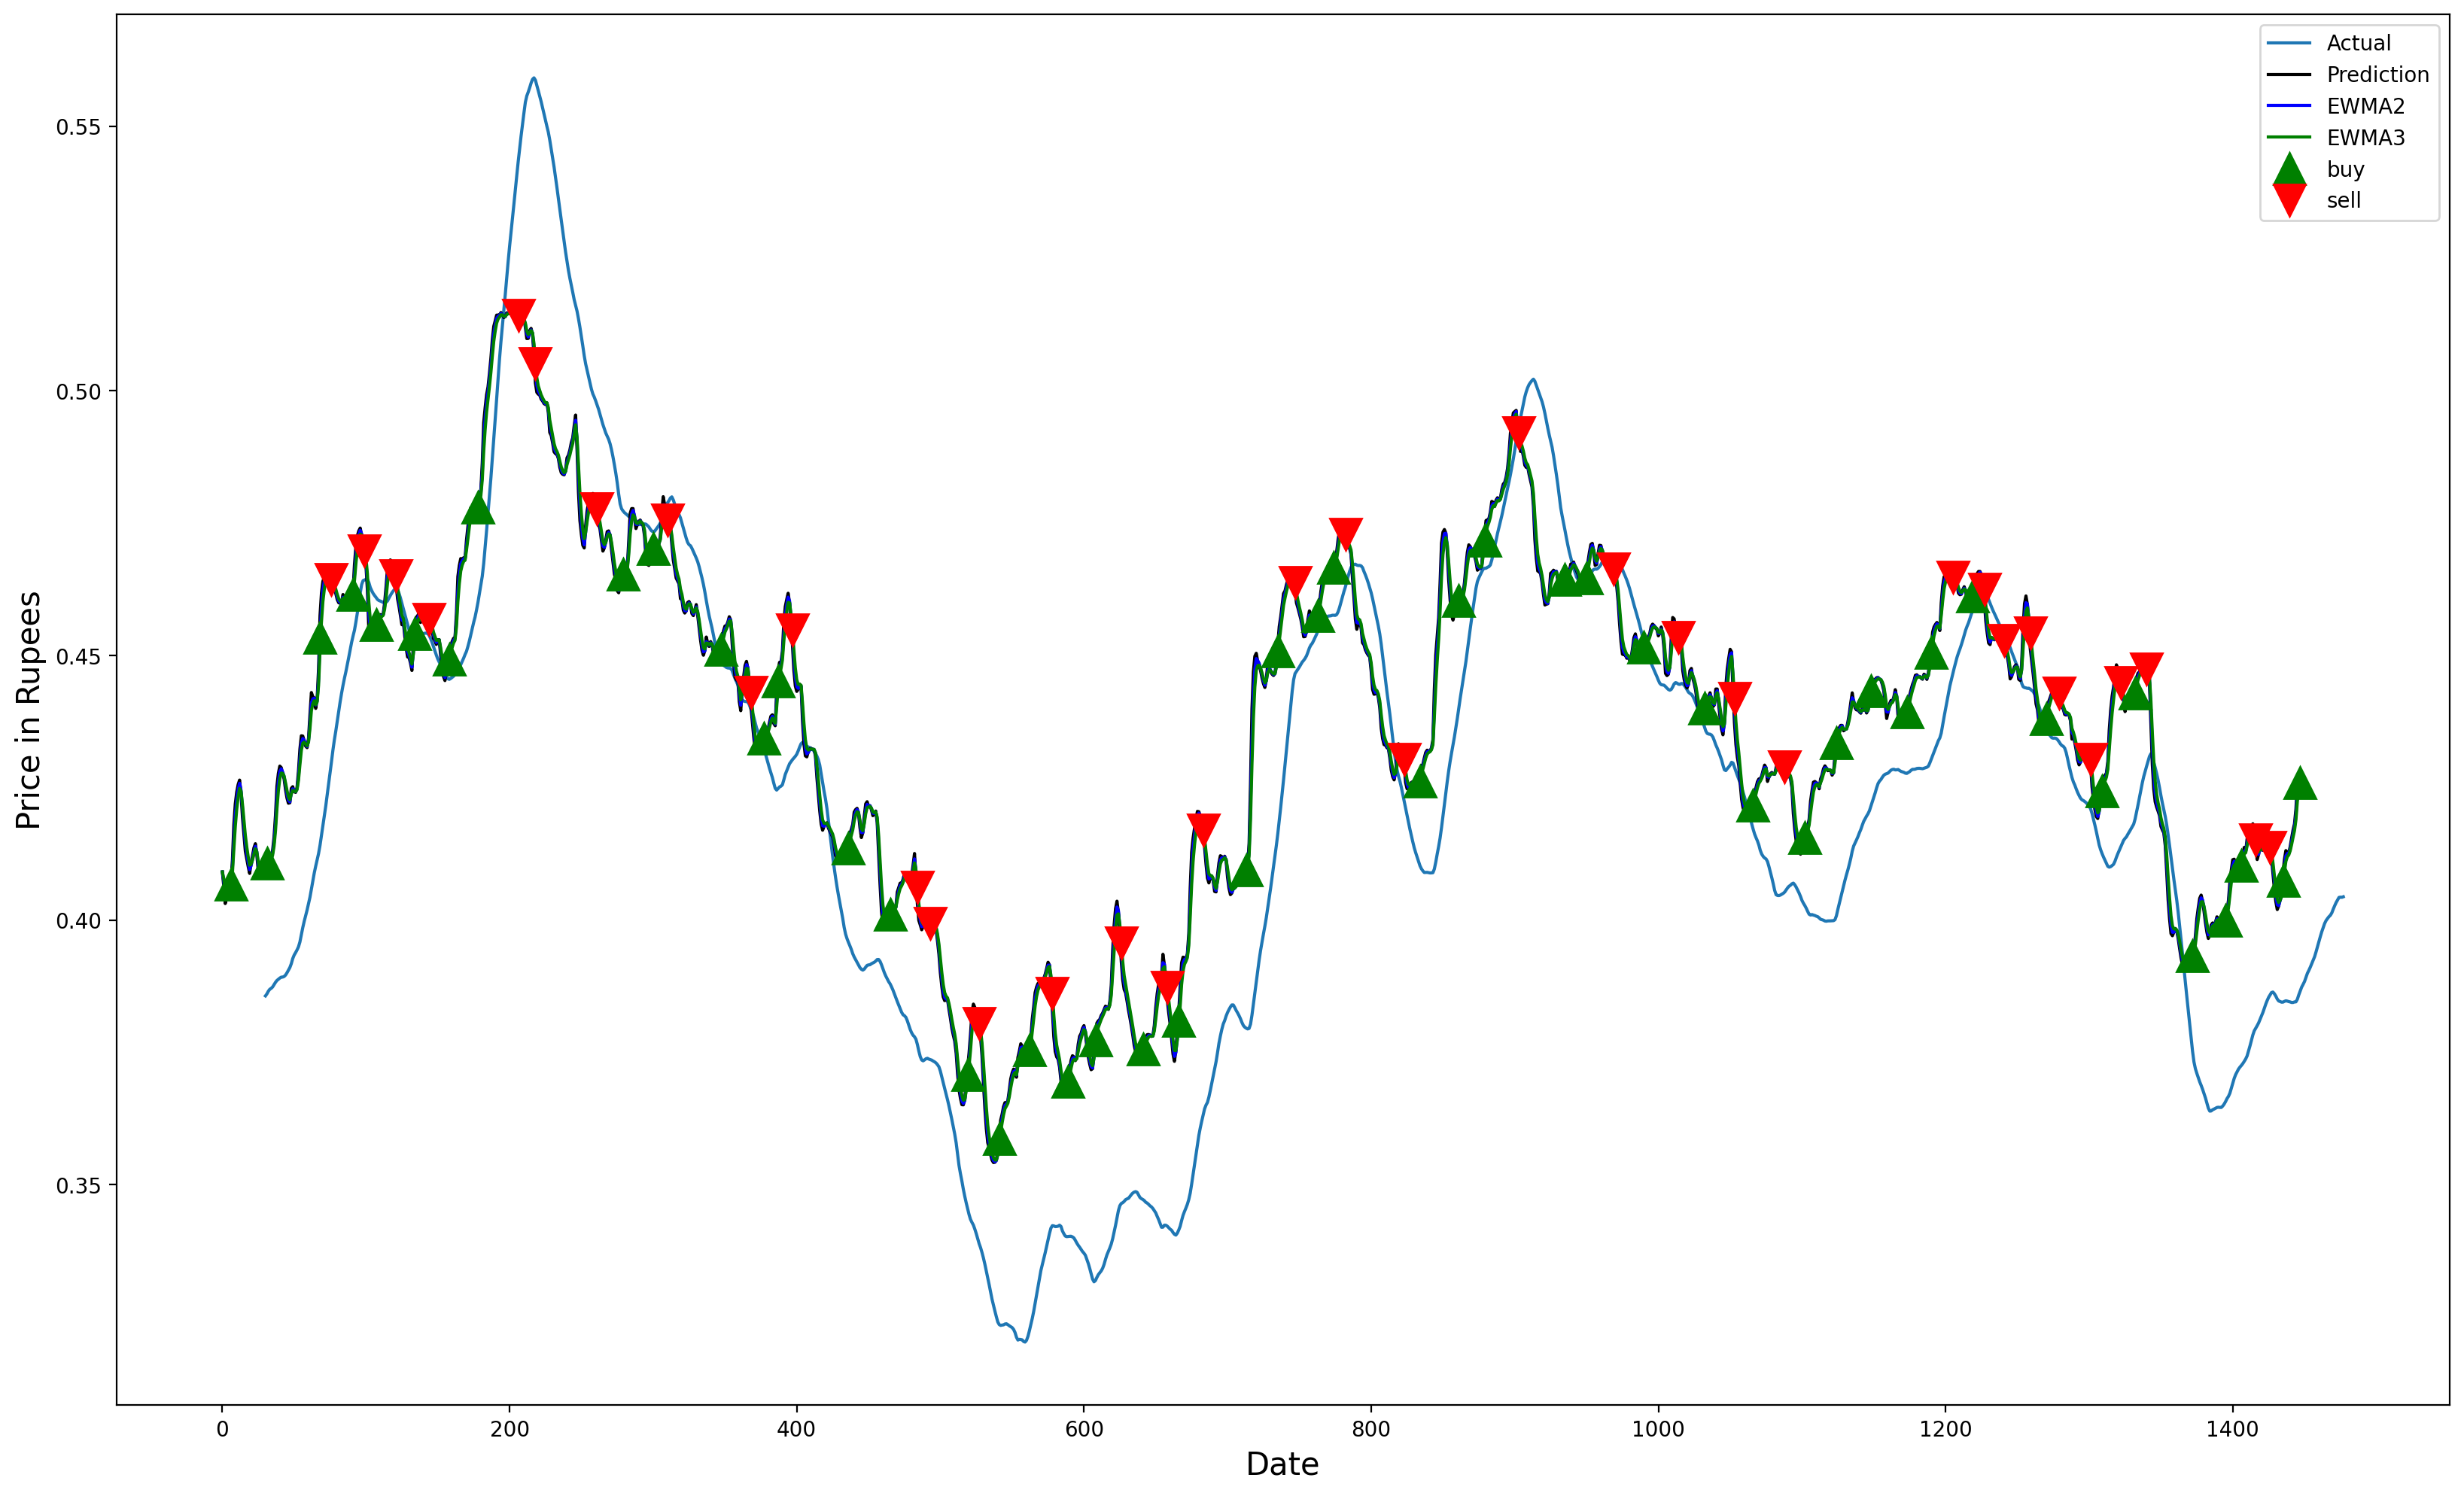

In [60]:
plt.figure(figsize = (20,12))

plt.plot(ac_avg_filler, label = 'Actual')

# plot close price, short-term and long-term moving averages 
pr_price_avg_df['prediction'].plot(color = 'k', label= 'Prediction') 
pr_price_avg_df['EWMA2'].plot(color = 'b',label = 'EWMA2') 
pr_price_avg_df['EWMA3'].plot(color = 'g', label = 'EWMA3')
# plot ‘buy’ signals
plt.plot(pr_price_avg_df[pr_price_avg_df['Signal'] == 1].index, 
         pr_price_avg_df['EWMA2'][pr_price_avg_df['Signal'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(pr_price_avg_df[pr_price_avg_df['Signal'] == -1].index, 
         pr_price_avg_df['EWMA3'][pr_price_avg_df['Signal'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend()
plt.show()

Evaluation



In [73]:
# Test Data Batch 1 , Test Data Batch 2 , Test Data Batch 3
url_test = 'H4_EURUSD.csv'
dataset_test_ok = pd.read_csv(url_test, usecols=['open', 'high', 'low', 'close'])
dataset_test_ok = dataset_test_ok.iloc[:500, :]
dataset_test_ok['avg'] = dataset_test_ok.iloc[:,0:-1].mean(axis=1)
dataset_test_ok.head()

,open,high,low,close,avg
0,1.0088,1.0106,1.0061,1.0062,1.008500
1,1.0073,1.0190,1.0073,1.0175,1.011200
2,1.0173,1.0181,1.0154,1.0157,1.016933
3,1.0154,1.0167,1.0093,1.0115,1.013800
4,1.0118,1.0118,1.0054,1.0073,1.009667


In [64]:
dataset_test_ok = df_h1

In [ ]:
df

In [65]:
# read test data
x1_test = dataset_test_ok['Open'].values
x2_test = dataset_test_ok['High'].values
x3_test = dataset_test_ok['Low'].values
x4_test = dataset_test_ok['Close'].values
y_test = dataset_test_ok['avg'].values # no need to scale

# convert to [rows, columns] structure
x1_test = x1_test.reshape((len(x1_test), 1))
x2_test = x2_test.reshape((len(x2_test), 1))
x3_test = x3_test.reshape((len(x3_test), 1))
x4_test = x4_test.reshape((len(x4_test), 1))
y_test = y_test.reshape((len(y_test), 1))

x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)
x3_test_scaled = scaler.fit_transform(x3_test)
x4_test_scaled = scaler.fit_transform(x4_test)


In [66]:
def prep_data(x1_test_scaled , x2_test_scaled , x3_test_scaled, x4_test_scaled, y_test , start , end , last):
    #prepare test data X
    dataset_test = hstack((x1_test_scaled, x2_test_scaled, x3_test_scaled, x4_test_scaled))
    dataset_test_X = dataset_test[start:end, :]
    test_X_new = dataset_test_X.reshape(1, dataset_test_X.shape[0] , dataset_test_X.shape[1])

    #prepare past and groundtruth
    past_data = y_test[:end , :]
    dataset_test_y = y_test[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)

    # predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]

    return y_pred_inv , dataset_test_y , past_data

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('')
    print('')

# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):

    plt.figure(figsize=(20, 4))

    y_mean = mean(prediction1)

    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')

    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

In [67]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):
    plt.figure(figsize=(20, 4))
    y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

In [71]:
for i in range(120,300,60):
    print(i)

120
180
240


In [74]:
print(y_pred_inv.shape , dataset_test_y.shape , past_data.shape)

(30,) (30, 1) (300, 1)


1/1 [==============================] - 0s 33ms/step
Test Data from 120 to 180
Mean Absolute Error: 0.00
Root Mean Square Error: 0.00


1/1 [==============================] - 0s 16ms/step
Test Data from 180 to 240
Mean Absolute Error: 0.00
Root Mean Square Error: 0.00


1/1 [==============================] - 0s 18ms/step
Test Data from 240 to 300
Mean Absolute Error: 0.00
Root Mean Square Error: 0.00




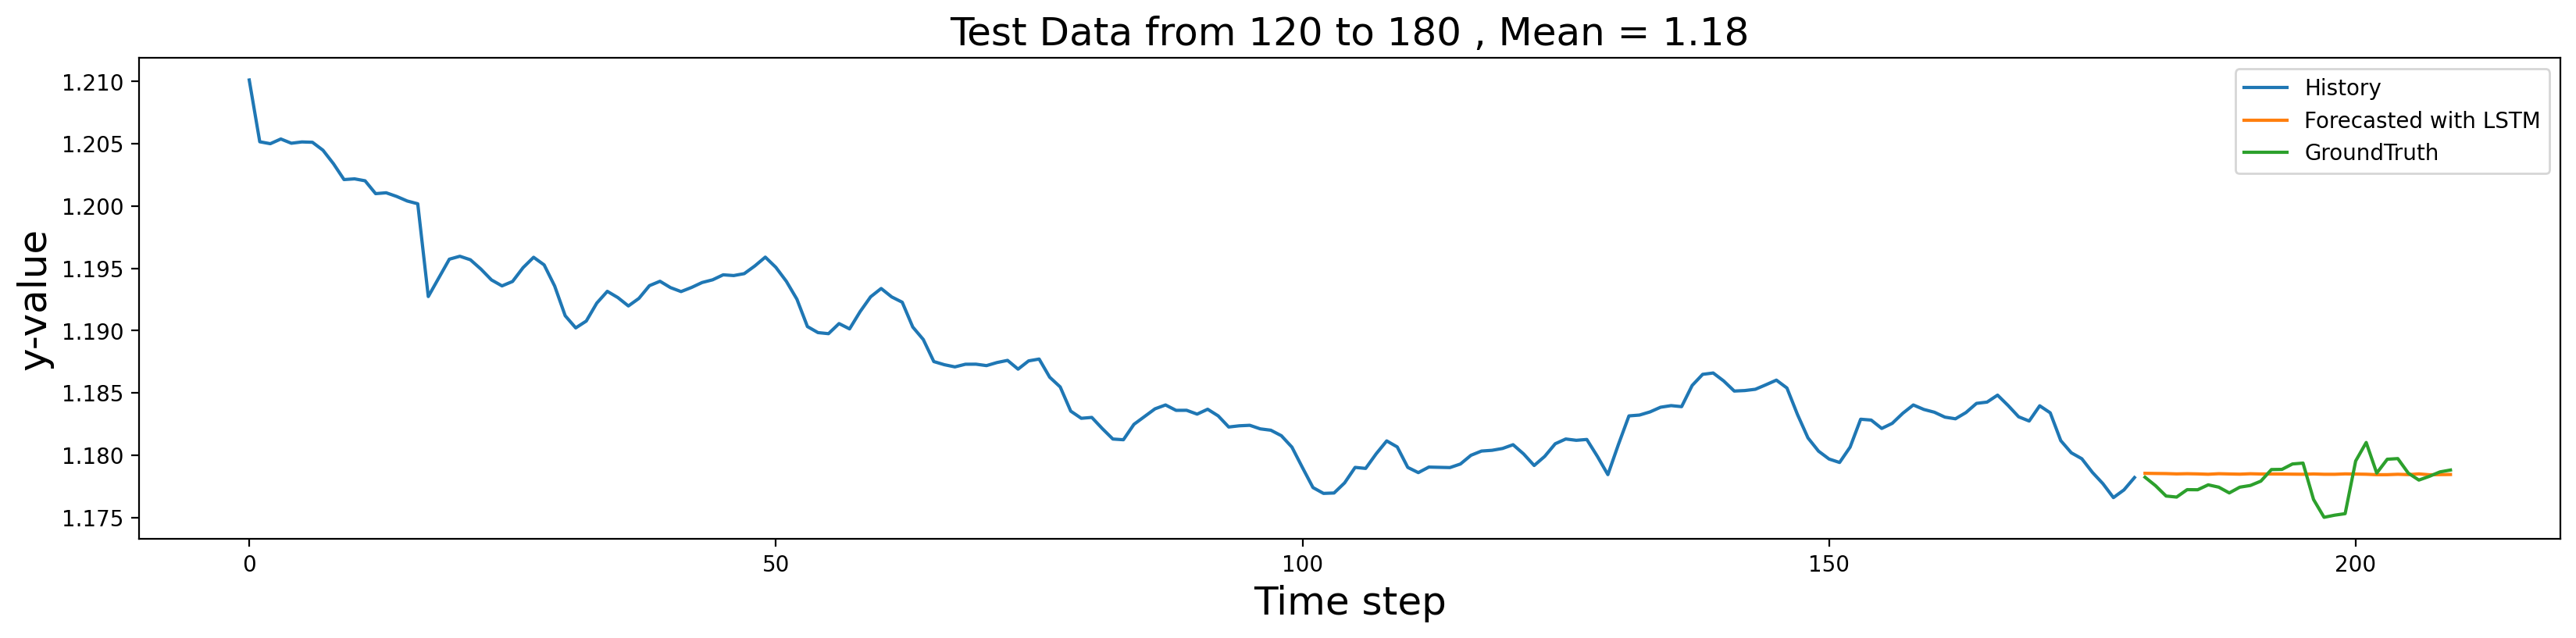

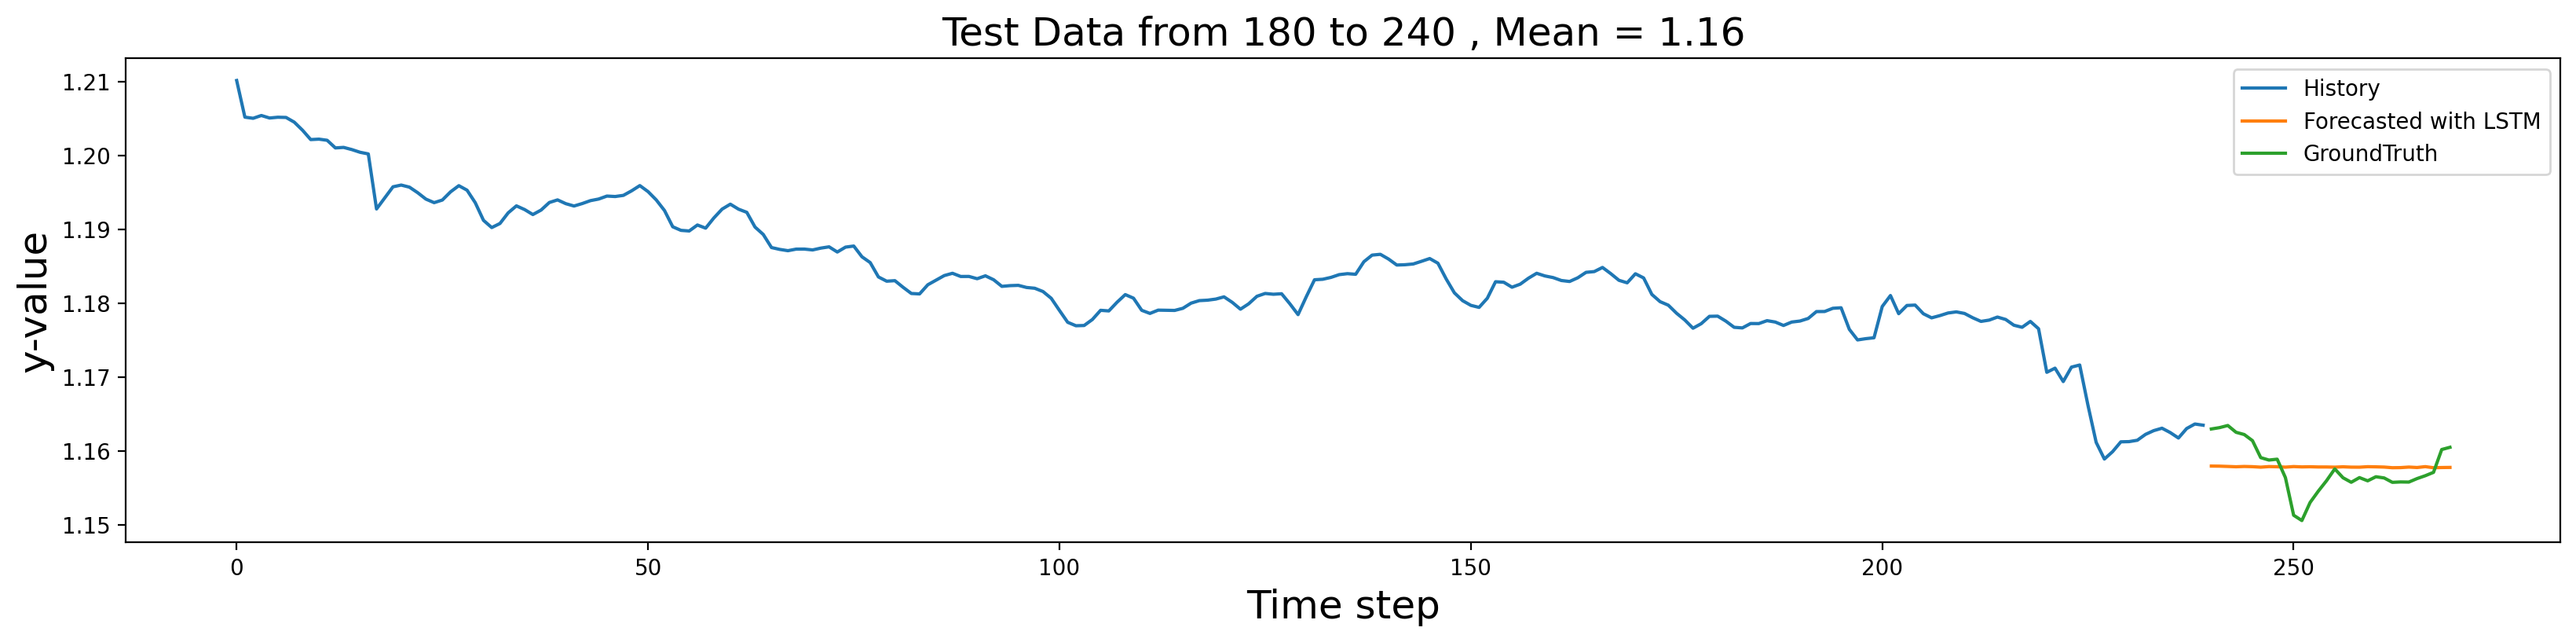

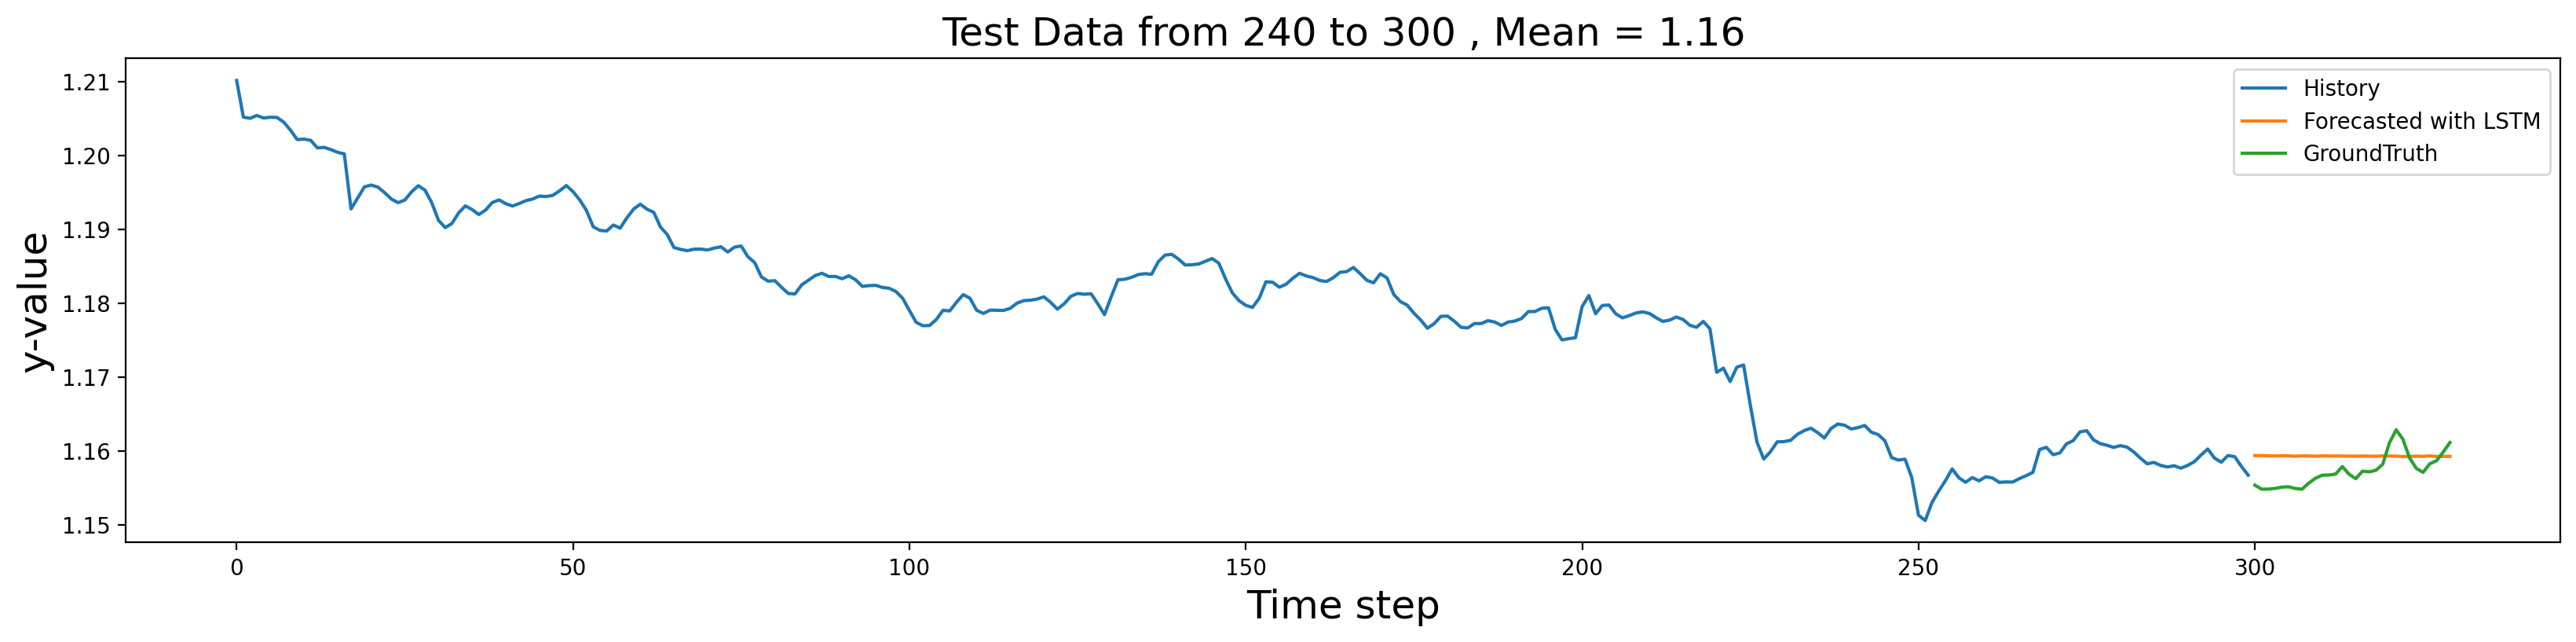

In [72]:
for i in range(120,300,60):
    start = i
    end = start + n_steps_in
    last = end + n_steps_out    
    y_pred_inv , dataset_test_y , past_data = prep_data(x1_test_scaled , x2_test_scaled , x3_test_scaled , x4_test_scaled , y_test , start , end , last)
    evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end)
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)


Save & Load


In [ ]:
# model_url = '/Directory/Filename.h5'
# model.save(model_url)
# print("Saved")

In [ ]:
# model_url = '/Directory/Filename.h5'
# model = load_model(model_url)
# print("Loaded")
# model.summary()